## Import dependencies and data file

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
import plotly.express as px

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
OSMI_MHIT_cleaned = pd.read_csv(Path('../resources/OSMI_MHIT_mostly_clean.csv')).set_index('new_id')
OSMI_MHIT_cleaned

,self_employed,company_size,tech_company,mh_coverage,mh_coverage_awareness,mh_employer_discussion,mh_resources_provided,mh_anonimity,mh_medical_leave,mh_discussion_negative_impact,...,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,quantile_age_1,quantile_age_2
new_id,,,,,,,,,,,,,,,,,,,,,
1,0,26-100,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Very easy,No,...,39,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Sometimes,"(38.0, 99.0]","(37.0, 39.0]"
2,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,"(28.0, 32.0]","(27.0, 29.0]"
3,0,6-25,1,No,I am not sure,No,No,I don't know,Neither easy nor difficult,Maybe,...,38,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Always,"(32.0, 38.0]","(37.0, 39.0]"
4,0,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
5,0,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,42,male,United Kingdom,none,United Kingdom,none,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0,100-500,1,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,Maybe,...,26,female,Canada,none,Canada,none,Other,Sometimes,"(19.999, 28.0]","(25.0, 27.0]"
1004,0,500-1000,1,Yes,No,No,No,Yes,Somewhat easy,No,...,38,female,United States of America,Illinois,United States of America,Illinois,Support,Always,"(32.0, 38.0]","(37.0, 39.0]"
1005,0,100-500,1,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,...,52,male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes,"(38.0, 99.0]","(44.0, 99.0]"


## inspect dataset

In [3]:
OSMI_MHIT_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 1 to 1007
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   self_employed                          1004 non-null   int64 
 1   company_size                           1004 non-null   object
 2   tech_company                           1004 non-null   int64 
 3   mh_coverage                            1004 non-null   object
 4   mh_coverage_awareness                  1004 non-null   object
 5   mh_employer_discussion                 1004 non-null   object
 6   mh_resources_provided                  1004 non-null   object
 7   mh_anonimity                           1004 non-null   object
 8   mh_medical_leave                       1004 non-null   object
 9   mh_discussion_negative_impact          1004 non-null   object
 10  ph_discussion_negative_impact          1004 non-null   object
 11  mh_discussion_cow

In [36]:
# inspect company size
OSMI_MHIT_cleaned['company_size'].value_counts()

26-100            263
More than 1000    231
100-500           212
6-25              181
500-1000           68
1-5                49
Name: company_size, dtype: int64

In [4]:
# inspect values for 'mh_for_others_bad_response_workplace'
OSMI_MHIT_cleaned['mh_for_others_bad_response_workplace'].value_counts()

No       176
Yes      168
Maybe    113
Name: mh_for_others_bad_response_workplace, dtype: int64

In [5]:
OSMI_MHIT_cleaned['mh_for_others_bad_response_workplace'].describe()

count     457
unique      3
top        No
freq      176
Name: mh_for_others_bad_response_workplace, dtype: object

In [6]:
# inspect values for 'yes_what_dx?'
OSMI_MHIT_cleaned['yes_what_dx?'].value_counts()

Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                             91
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                 76
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                               34
Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                        21
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder    18
                                                                                                                                                  ..
Obsessive-Compulsive Disorder                                                                             

In [7]:
# inspect values for 'yes_condition_dx'
OSMI_MHIT_cleaned['yes_condition_dx'].value_counts()

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                        140
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                    116
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                       50
Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                                                27
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                            22
                                                                                                                                       

## clean data and fill null values

In [8]:
# fill null values in 'mh_for_others_bad_response_workplace' with 'none'
OSMI_MHIT_cleaned['mh_for_others_bad_response_workplace'].fillna('no answer', inplace = True)

# fill null values in 'yes_what_dx?' with 'none'
OSMI_MHIT_cleaned['yes_what_dx?'].fillna('no answer', inplace = True)

# fill null values in 'yes_condition_dx' with 'none'
OSMI_MHIT_cleaned['yes_condition_dx'].fillna('no answer', inplace = True)

In [37]:
OSMI_MHIT_cleaned['company_size']=OSMI_MHIT_cleaned['company_size'].replace('More than 1000','1000+')

## create arrays and variables

In [9]:
OSMI_MHIT_cleaned['country_live'].value_counts()

United States of America    707
United Kingdom              134
Canada                       62
Germany                      44
Netherlands                  31
Australia                    26
Name: country_live, dtype: int64

In [10]:
OSMI_MHIT_cleaned['country_work'].value_counts()

United States of America    709
United Kingdom              133
Canada                       60
Germany                      44
Netherlands                  31
Australia                    26
United Arab Emirates          1
Name: country_work, dtype: int64

In [11]:
# submissions for US-working and US-living reporters
live_work_in_USA = OSMI_MHIT_cleaned.loc[(OSMI_MHIT_cleaned['country_live']=='United States of America') & (OSMI_MHIT_cleaned['country_work']=='United States of America')]
live_work_in_USA

,self_employed,company_size,tech_company,mh_coverage,mh_coverage_awareness,mh_employer_discussion,mh_resources_provided,mh_anonimity,mh_medical_leave,mh_discussion_negative_impact,...,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,quantile_age_1,quantile_age_2
new_id,,,,,,,,,,,,,,,,,,,,,
2,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,"(28.0, 32.0]","(27.0, 29.0]"
4,0,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
6,0,26-100,1,I don't know,No,No,No,I don't know,Somewhat easy,No,...,30,male,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes,"(28.0, 32.0]","(29.0, 30.0]"
7,0,More than 1000,1,Yes,Yes,No,Yes,Yes,Very easy,No,...,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always,"(32.0, 38.0]","(34.0, 37.0]"
8,0,26-100,0,I don't know,No,No,No,I don't know,Very difficult,Yes,...,44,female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,500-1000,1,No,No,No,No,I don't know,Somewhat easy,Maybe,...,24,male,United States of America,Arizona,United States of America,Arizona,Front-end Developer,Never,"(19.999, 28.0]","(19.0, 25.0]"
998,0,More than 1000,1,Yes,Yes,Yes,Yes,Yes,Somewhat easy,Maybe,...,41,male,United States of America,Alabama,United States of America,Alabama,Supervisor/Team Lead|Back-end Developer|Designer,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
1004,0,500-1000,1,Yes,No,No,No,Yes,Somewhat easy,No,...,38,female,United States of America,Illinois,United States of America,Illinois,Support,Always,"(32.0, 38.0]","(37.0, 39.0]"


In [12]:
# submissions for non-US-working and non-US-living reporters
live_work_not_in_USA = OSMI_MHIT_cleaned.loc[(OSMI_MHIT_cleaned['country_live']!='United States of America') & (OSMI_MHIT_cleaned['country_work']!='United States of America')]
live_work_not_in_USA

,self_employed,company_size,tech_company,mh_coverage,mh_coverage_awareness,mh_employer_discussion,mh_resources_provided,mh_anonimity,mh_medical_leave,mh_discussion_negative_impact,...,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,quantile_age_1,quantile_age_2
new_id,,,,,,,,,,,,,,,,,,,,,
1,0,26-100,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Very easy,No,...,39,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Sometimes,"(38.0, 99.0]","(37.0, 39.0]"
3,0,6-25,1,No,I am not sure,No,No,I don't know,Neither easy nor difficult,Maybe,...,38,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Always,"(32.0, 38.0]","(37.0, 39.0]"
5,0,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,42,male,United Kingdom,none,United Kingdom,none,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
12,0,100-500,0,Yes,Yes,Yes,Yes,Yes,Somewhat easy,No,...,44,male,Canada,none,Canada,none,DevOps/SysAdmin|Back-end Developer|Front-end D...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
15,0,26-100,1,Not eligible for coverage / N/A,No,No,No,I don't know,Very difficult,Maybe,...,32,female,Canada,none,Canada,none,Front-end Developer,Always,"(28.0, 32.0]","(30.0, 32.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0,100-500,1,Yes,I am not sure,Yes,I don't know,I don't know,Somewhat easy,No,...,24,male,Canada,none,Canada,none,Back-end Developer,Sometimes,"(19.999, 28.0]","(19.0, 25.0]"
1001,0,100-500,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Somewhat difficult,Maybe,...,22,female,Canada,none,Canada,none,Back-end Developer|Front-end Developer,Sometimes,"(19.999, 28.0]","(19.0, 25.0]"
1002,0,100-500,1,Yes,I am not sure,Yes,Yes,Yes,Somewhat easy,No,...,24,male,Canada,none,Canada,none,Supervisor/Team Lead|Front-end Developer|Back-...,Sometimes,"(19.999, 28.0]","(19.0, 25.0]"


In [13]:
# Calculate the percentage of mh_coverage responses for each USA live-work
mh_coverage_in_USA_percents = 100 * live_work_in_USA.groupby(['mh_coverage']).count()['self_employed']/live_work_in_USA['self_employed'].count()
round(mh_coverage_in_USA_percents,2)

mh_coverage
I don't know                       27.62
No                                  9.49
Not eligible for coverage / N/A     2.69
Yes                                60.20
Name: self_employed, dtype: float64

In [14]:
# Calculate the percentage of mh_coverage responses for each non-USA live-work
mh_coverage_not_in_USA_percents = 100 * live_work_not_in_USA.groupby(['mh_coverage']).count()['self_employed']/live_work_not_in_USA['self_employed'].count()
round(mh_coverage_not_in_USA_percents,2)


mh_coverage
I don't know                       26.87
No                                 29.25
Not eligible for coverage / N/A    15.31
Yes                                28.57
Name: self_employed, dtype: float64

## Chart MH Insur. coverage by city nationality.

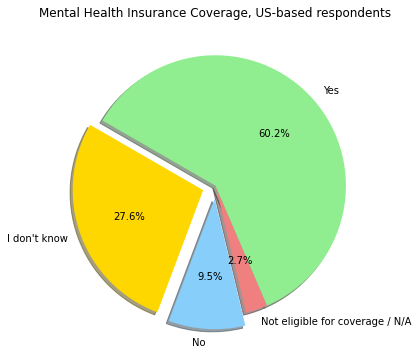

In [16]:
# Coverage in USA
plt.subplots(figsize=(10, 6))
plt.pie(mh_coverage_in_USA_percents,
        labels=["I don't know", "No", "Not eligible for coverage / N/A", "Yes"],
        colors=["gold", "lightskyblue", "lightcoral", "lightgreen"],
        explode=[0.1, 0.1, 0,0],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("Mental Health Insurance Coverage, US-based respondents")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("../images/mh_covg_USA.png")

# Show Figure
plt.show()

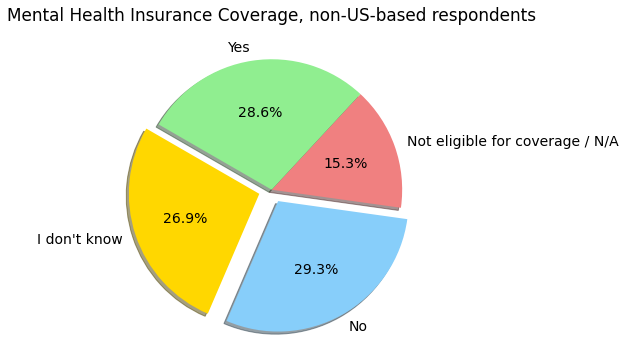

In [17]:
# Coverage outside of USA
plt.subplots(figsize=(10, 6))
plt.pie(mh_coverage_not_in_USA_percents,
        labels=["I don't know", "No", "Not eligible for coverage / N/A", "Yes"],
        colors=["gold", "lightskyblue", "lightcoral", "lightgreen"],
        explode=[0.1, 0.1, 0,0],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("Mental Health Insurance Coverage, non-US-based respondents")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("../images/mh_covg_not_USA.png")

# Show Figure
plt.show()

## plot MH Family History vs MH dx past & current

In [15]:
OSMI_MHIT_fam_dx_hist = OSMI_MHIT_cleaned[['mh_family_history','mh_dx_past','mh_dx_current']]

In [16]:
OSMI_MHIT_fam_dx_hist['mh_family_history'].value_counts()

Yes             492
No              325
I don't know    187
Name: mh_family_history, dtype: int64

In [17]:
OSMI_MHIT_fam_dx_hist['mh_dx_past'].value_counts()

Yes      537
No       310
Maybe    157
Name: mh_dx_past, dtype: int64

In [18]:
OSMI_MHIT_fam_dx_hist['mh_dx_current'].value_counts()

Yes      426
No       361
Maybe    217
Name: mh_dx_current, dtype: int64

### encode categorical values to numeric

In [ ]:
# mh_family_history
OSMI_MHIT_fam_dx_hist["mh_family_history"].replace({"Yes": "1",
                                                    "No": "0",
                                                    "I don't know": "0.5"}, inplace=True)

# mh_family_history and mh_family_history
OSMI_MHIT_fam_dx_hist["mh_dx_past"].replace({"Yes": "1",
                                               "No": "0",
                                               "Maybe": "0.5"}, inplace=True)

# mh_family_history and mh_family_history
OSMI_MHIT_fam_dx_hist["mh_dx_current"].replace({"Yes": "1",
                                                  "No": "0",
                                                  "Maybe": "0.5"}, inplace=True)

# mh_family_history to integer
OSMI_MHIT_fam_dx_hist[["mh_family_history",
                       "mh_dx_past",
                       "mh_dx_current"]] = OSMI_MHIT_fam_dx_hist[["mh_family_history",
                                                                  "mh_dx_past",
                                                                  "mh_dx_current"]].apply(pd.to_numeric)

In [ ]:
OSMI_MHIT_fam_dx_hist

In [ ]:
# Plotting the clusters with three features
fig = px.scatter_3d(OSMI_MHIT_fam_dx_hist,
                    x="mh_family_history",
                    y="mh_dx_past",
                    z="mh_dx_current",
                    color="mh_dx_current",
                    symbol="mh_dx_past",
                    #size="sepal_width",
                    width=900)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()


## additional exploration

In [19]:
# explore position distribution
OSMI_MHIT_cleaned['work_position'].value_counts().head(20)

Back-end Developer                                             201
Front-end Developer                                            104
Other                                                           87
Supervisor/Team Lead                                            55
Back-end Developer|Front-end Developer                          53
DevOps/SysAdmin                                                 45
Support                                                         29
Front-end Developer|Back-end Developer                          25
Dev Evangelist/Advocate                                         25
Executive Leadership                                            24
Designer                                                        18
Front-end Developer|Designer                                    17
Supervisor/Team Lead|Back-end Developer                         15
Supervisor/Team Lead|Back-end Developer|Front-end Developer     14
DevOps/SysAdmin|Back-end Developer                            

In [20]:
# create dataframe for demographic info
respondent_demog = OSMI_MHIT_cleaned[['age','gender','country_live','live_us_state','country_work','work_us_state',
                                      'work_position','remote']].copy()
respondent_demog

,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote
new_id,,,,,,,,
1,39,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Sometimes
2,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
3,38,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Always
4,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,42,male,United Kingdom,none,United Kingdom,none,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
...,...,...,...,...,...,...,...,...
1003,26,female,Canada,none,Canada,none,Other,Sometimes
1004,38,female,United States of America,Illinois,United States of America,Illinois,Support,Always
1005,52,male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes


In [21]:
# create dataframe for age distribution
respond_age_cnts = respondent_demog['age'].value_counts().rename_axis('age').reset_index(name='counts')
respond_age_cnts

,age,counts
0,30,67
1,28,59
2,32,57
3,35,55
4,29,54
5,31,53
6,26,49
7,27,49
8,34,48
9,33,44


In [22]:
# binning by age
bins = [20, 30, 40, 50, 60, 70, 100]
respondent_demog['binned_age'] = pd.cut(respondent_demog['age'],bins)
respondent_demog.head()

,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,binned_age
new_id,,,,,,,,,
1,39,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Sometimes,"(30, 40]"
2,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,"(20, 30]"
3,38,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Always,"(30, 40]"
4,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,"(40, 50]"
5,42,male,United Kingdom,none,United Kingdom,none,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,"(40, 50]"


In [23]:
# create variables for age counts for charting
x_axis = respond_age_cnts['counts']
y_axis = respond_age_cnts['age']
# color_key = respondent_demog['binned_age']

No handles with labels found to put in legend.


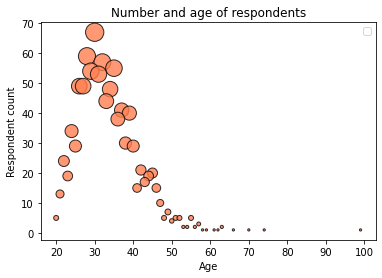

In [24]:
# Create a scatter plot
plt.scatter(y_axis,
            x_axis,
            s=x_axis*5,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8)

# Create labels for the axes
plt.xlabel('Age')
plt.ylabel('Respondent count')

# Create a title
plt.title("Number and age of respondents")

# Save Figure
plt.savefig("../images/respond_cnt_age.png")

# Add the legend.
plt.legend()

In [26]:
# inspect company size distribution
OSMI_MHIT_cleaned['company_size'].value_counts().sort_index()

1-5                49
100-500           212
26-100            263
500-1000           68
6-25              181
More than 1000    231
Name: company_size, dtype: int64

## age vs stigma and awareness

In [25]:
# inspect distribution of 'mh_discussion_negative_impact' responses
OSMI_MHIT_cleaned['mh_discussion_negative_impact'].value_counts()

Maybe    427
No       383
Yes      194
Name: mh_discussion_negative_impact, dtype: int64

In [27]:
# create dataframe for age and 'mh_discussion_negative_impact' responses
mh_discuss_boss_impact = pd.DataFrame(OSMI_MHIT_cleaned.groupby(['age', 'mh_discussion_negative_impact'])['self_employed'].count())
mh_discuss_boss_impact = mh_discuss_boss_impact.reset_index()

In [28]:
# pivot values
mh_discuss_boss_impact = mh_discuss_boss_impact.pivot(index='age', columns = "mh_discussion_negative_impact", values='self_employed')
mh_discus_impact_answer = mh_discuss_boss_impact[['Yes', 'No', 'Maybe']]
mh_discus_impact_answer.head()


mh_discussion_negative_impact,Yes,No,Maybe
age,,,
20,2.0,2.0,1.0
21,4.0,1.0,8.0
22,6.0,7.0,11.0
23,6.0,9.0,4.0
24,6.0,16.0,12.0


<AxesSubplot:title={'center':'Do you think that discussing a mental health disorder with your employer would have negative consequences?'}, xlabel='Age', ylabel='Responses'>

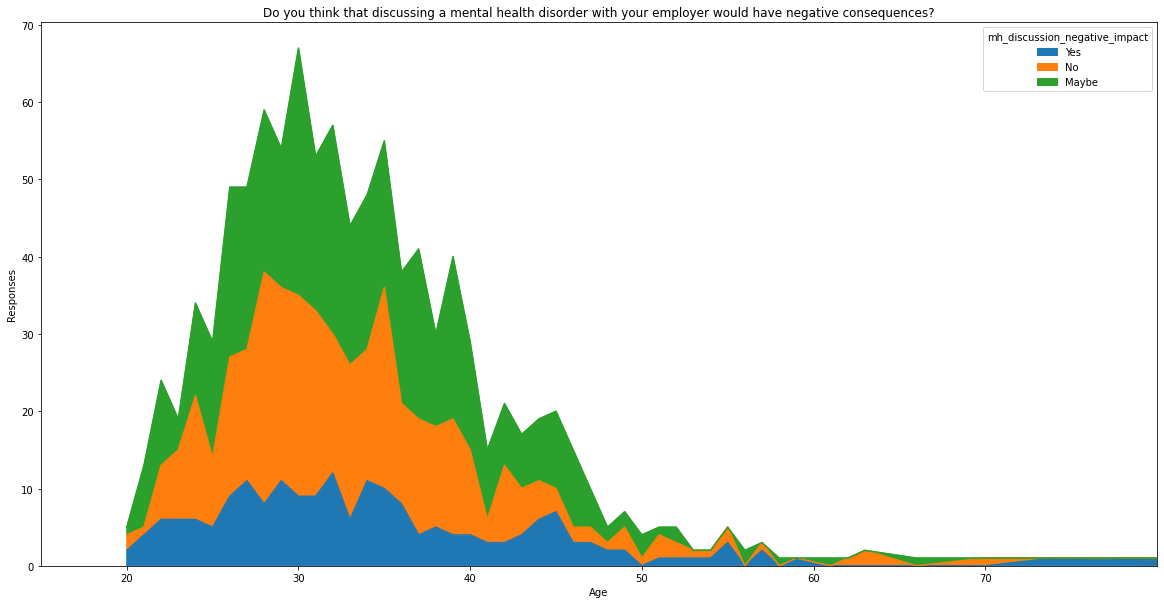

In [29]:
# create stacked area plot for responses
mh_discus_impact_answer.plot(
    xlabel='Age',
    ylabel='Responses',
    xlim=[15,80],
    title='Do you think that discussing a mental health disorder with your employer would have negative consequences?',
    kind='area',
    figsize=(20,10),
    grid=False,
    xticks=[20,30,40,50,60,70]
)
# Save Figure
plt.savefig("../images/mh_discus_impact.png")

## coworker discussion response vs age

In [30]:
mh_discuss_cowork_impact = pd.DataFrame(OSMI_MHIT_cleaned.groupby(['age', 'mh_discussion_coworkers'])['self_employed'].count())
mh_discuss_cowork_impact = mh_discuss_cowork_impact.reset_index()

In [31]:
mh_discuss_cowork_impact = mh_discuss_cowork_impact.pivot(index='age', columns = "mh_discussion_coworkers", values='self_employed')
mh_discus_cowork_impact_answer = mh_discuss_cowork_impact[['Yes', 'No', 'Maybe']]
mh_discus_cowork_impact_answer.head()

mh_discussion_coworkers,Yes,No,Maybe
age,,,
20,1.0,2.0,2.0
21,NaN,4.0,9.0
22,3.0,11.0,10.0
23,2.0,4.0,13.0
24,6.0,8.0,20.0


<AxesSubplot:title={'center':'Would you feel comfortable discussing a mental health disorder with your coworkers?'}, xlabel='Age', ylabel='Responses'>

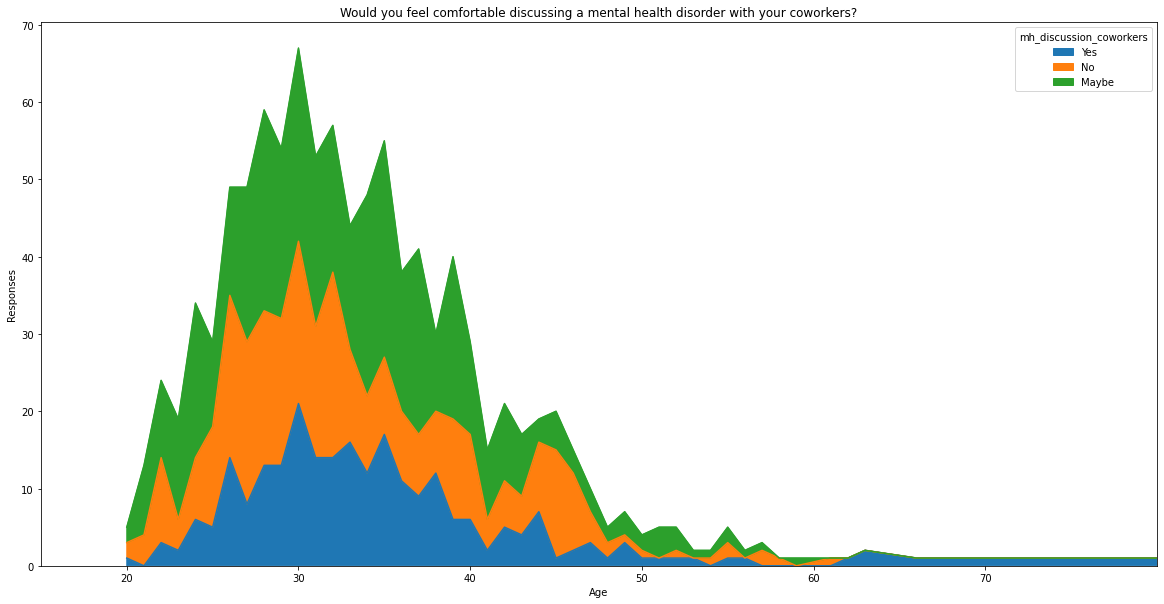

In [32]:
mh_discus_cowork_impact_answer.plot(
    xlabel='Age',
    ylabel='Responses',
    xlim=[15,80],
    title='Would you feel comfortable discussing a mental health disorder with your coworkers?',
    kind='area',
    figsize=(20,10),
    grid=False,
    xticks=[20,30,40,50,60,70]
)
# Save Figure
plt.savefig("../images/mh_discus_cowork_impact.png")

## company size vs mh coverage

In [132]:
# create dataframe for company size and 'mh_coverage' responses
mh_covg_comp_size = pd.DataFrame(OSMI_MHIT_cleaned.groupby(['company_size', 'mh_coverage'])['self_employed'].count())
mh_covg_comp_size = mh_covg_comp_size.reset_index()
mh_covg_comp_size

,company_size,mh_coverage,self_employed
0,1-5,I don't know,9
1,1-5,No,21
2,1-5,Not eligible for coverage / N/A,11
3,1-5,Yes,8
4,100-500,I don't know,65
5,100-500,No,21
6,100-500,Not eligible for coverage / N/A,6
7,100-500,Yes,120
8,1000+,I don't know,44
9,1000+,No,18


In [133]:
#mh_covg_comp_size['size_num'] = mh_covg_comp_size['company_size'].str.split('-').str[0]
#mh_covg_comp_size['size_num'] = mh_covg_comp_size['size_num'].replace('1000+','1000')
#mh_covg_comp_size['size_num'].apply(pd.to_numeric, errors='ignore')
#mh_covg_comp_size

,company_size,mh_coverage,self_employed,size_num
0,1-5,I don't know,9,1
1,1-5,No,21,1
2,1-5,Not eligible for coverage / N/A,11,1
3,1-5,Yes,8,1
4,100-500,I don't know,65,100
5,100-500,No,21,100
6,100-500,Not eligible for coverage / N/A,6,100
7,100-500,Yes,120,100
8,1000+,I don't know,44,1000
9,1000+,No,18,1000


In [145]:
mh_covg_comp_size_answer = mh_covg_comp_size.pivot(index=['company_size'],columns = ["mh_coverage"] , values='self_employed')
mh_covg_comp_size_answer = mh_covg_comp_size_answer[['Yes', 'No', "I don't know","Not eligible for coverage / N/A"]]
#mh_covg_comp_size_answer = pd.DataFrame(mh_covg_comp_size_answer.groupby(['size_num']))
mh_covg_comp_size_answer
#mh_covg_comp_size

mh_coverage,Yes,No,I don't know,Not eligible for coverage / N/A
company_size,,,,
1-5,8,21,9,11
100-500,120,21,65,6
1000+,152,18,44,17
26-100,131,39,84,9
500-1000,40,7,19,2
6-25,59,48,54,20


In [157]:
mh_covg_comp_size_answer['size_num'] = mh_covg_comp_size_answer.index.str.split('-').str[0]
mh_covg_comp_size_answer['size_num'] = mh_covg_comp_size_answer['size_num'].replace('1000+','1000')
mh_covg_comp_size_answer['size_num'] = mh_covg_comp_size_answer['size_num'].apply(pd.to_numeric, errors='ignore')
mh_covg_comp_size_answer = mh_covg_comp_size_answer.sort_values(by='size_num')
mh_covg_comp_size_answer = mh_covg_comp_size_answer.drop(['size_num'], axis=1)
mh_covg_comp_size_answer

mh_coverage,Yes,No,I don't know,Not eligible for coverage / N/A
company_size,,,,
1-5,8,21,9,11
6-25,59,48,54,20
26-100,131,39,84,9
100-500,120,21,65,6
500-1000,40,7,19,2
1000+,152,18,44,17


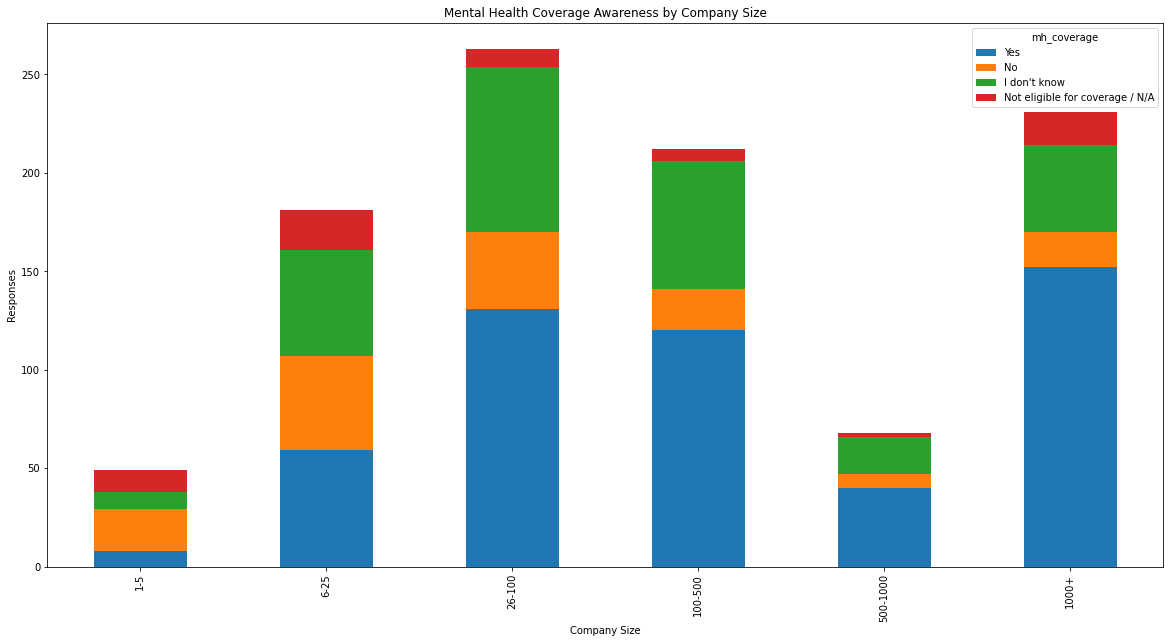

In [159]:
mh_covg_comp_size_answer.plot(
    xlabel='Company Size',
    ylabel='Responses',
    #xlim=[15,80],
    title='Mental Health Coverage Awareness by Company Size',
    kind='bar',
    stacked=True,
    figsize=(20,10),
    grid=False,
    #xticks=[20,30,40,50,60,70]
)

# Save Figure
plt.savefig("../images/mh_covg_aware_by_comp_size.png")

## company size vs. does employer take mh as seriously as ph

In [160]:
# create dataframe for company size and 'mh_equal_ph' responses
mh_eql_ph_and_comp_size = pd.DataFrame(OSMI_MHIT_cleaned.groupby(['company_size', 'mh_equal_ph'])['self_employed'].count())
mh_eql_ph_and_comp_size = mh_eql_ph_and_comp_size.reset_index()
mh_eql_ph_and_comp_size

,company_size,mh_equal_ph,self_employed
0,1-5,I don't know,22
1,1-5,No,6
2,1-5,Yes,21
3,100-500,I don't know,107
4,100-500,No,52
5,100-500,Yes,53
6,1000+,I don't know,92
7,1000+,No,83
8,1000+,Yes,56
9,26-100,I don't know,103


In [161]:
# pivot table values
mh_eql_ph_and_comp_size_pivot = mh_eql_ph_and_comp_size.pivot(index=['company_size'],columns = ["mh_equal_ph"] , values='self_employed')
mh_eql_ph_and_comp_size_pivot = mh_eql_ph_and_comp_size_pivot[['Yes', 'No', "I don't know"]]

mh_eql_ph_and_comp_size_pivot

mh_equal_ph,Yes,No,I don't know
company_size,,,
1-5,21,6,22
100-500,53,52,107
1000+,56,83,92
26-100,89,71,103
500-1000,25,18,25
6-25,61,36,84


In [162]:
# sorting by company size; create sort colum - sort - remove sort column
# create sort column from first number in 'company_size' column using split
mh_eql_ph_and_comp_size_pivot['size_num'] = mh_eql_ph_and_comp_size_pivot.index.str.split('-').str[0]
# clean "+" from "1000+"
mh_eql_ph_and_comp_size_pivot['size_num'] = mh_eql_ph_and_comp_size_pivot['size_num'].replace('1000+','1000')
# change values in sort column to numerical values
mh_eql_ph_and_comp_size_pivot['size_num'] = mh_eql_ph_and_comp_size_pivot['size_num'].apply(pd.to_numeric, errors='ignore')
# sort numerical "size_num" column in ascending order
mh_eql_ph_and_comp_size_pivot = mh_eql_ph_and_comp_size_pivot.sort_values(by='size_num')
# drop "size_num" column from dataframe
mh_eql_ph_and_comp_size_pivot = mh_eql_ph_and_comp_size_pivot.drop(['size_num'], axis=1)
mh_eql_ph_and_comp_size_pivot

mh_equal_ph,Yes,No,I don't know
company_size,,,
1-5,21,6,22
6-25,61,36,84
26-100,89,71,103
100-500,53,52,107
500-1000,25,18,25
1000+,56,83,92


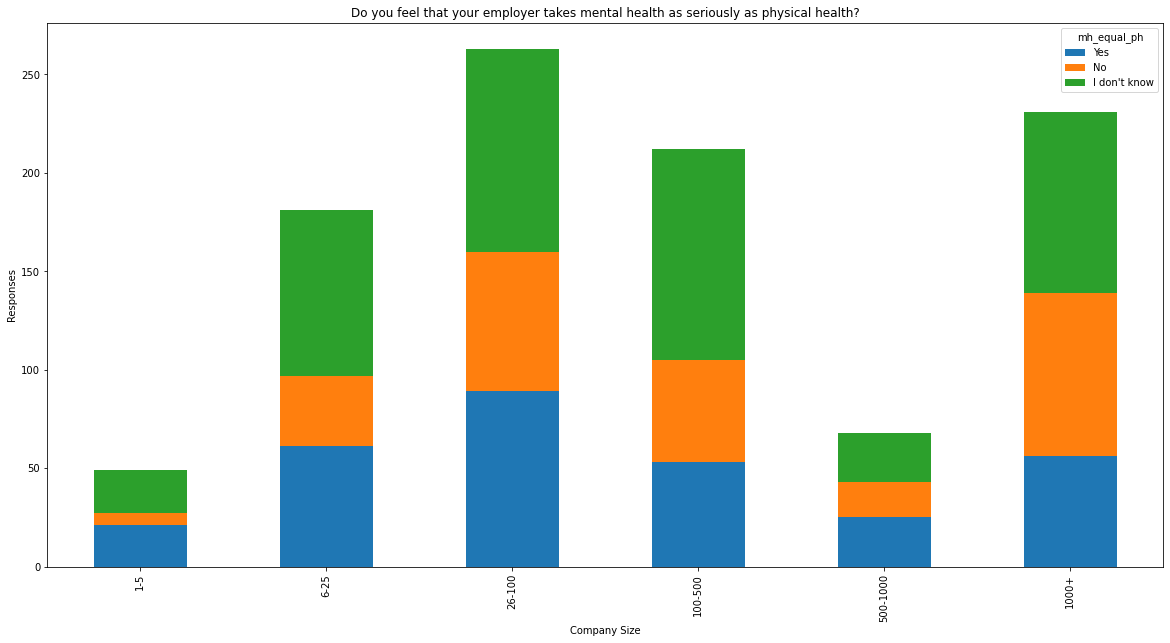

In [163]:
mh_eql_ph_and_comp_size_pivot.plot(
    xlabel='Company Size',
    ylabel='Responses',
    title='Do you feel that your employer takes mental health as seriously as physical health?',
    kind='bar',
    stacked=True,
    figsize=(20,10),
    grid=False,
)

# Save Figure
plt.savefig("../images/mh_eql_to_ph_by_comp_size.png")